In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")  # Adjust the filename if needed

# View the first few rows
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [6]:
df.shape

(2443651, 9)

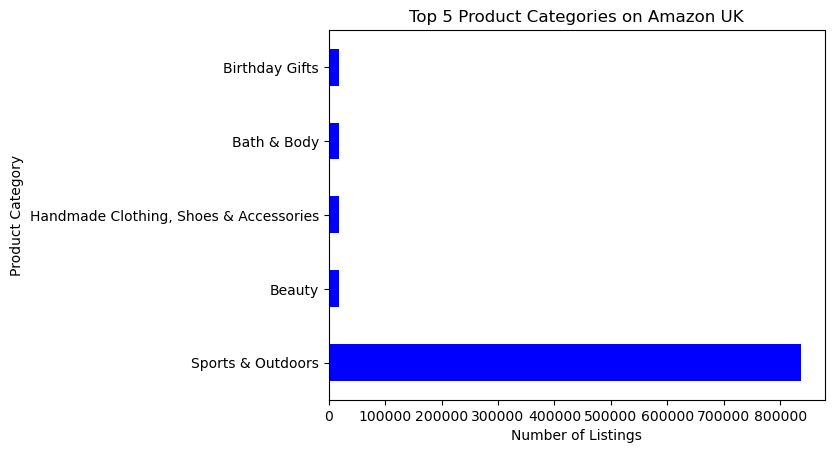

In [5]:
# Part 1: Understanding Product Categories

# **Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

# 1. **Frequency Tables**:
    # - Generate a frequency table for the product `category`.
    # - Which are the top 5 most listed product categories?


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

category_freq = df['category'].value_counts()

category_freq.head(5).plot(kind='barh', color='blue') # bar color
plt.title("Top 5 Product Categories on Amazon UK")
plt.xlabel("Number of Listings")
plt.ylabel("Product Category")
plt.show()


# The top 5 product categories are Sports & Outdoors, Beauty, Handmade Clothing, Shoes & Accessories, Bath & Body and Birthday Gifts

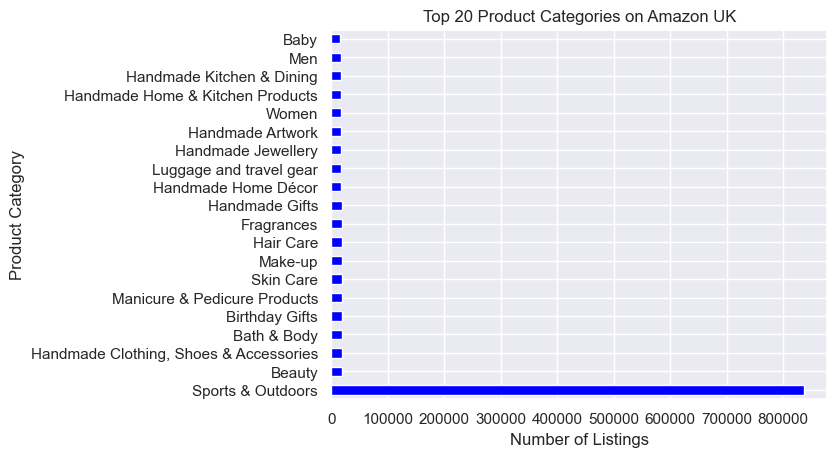

In [17]:
# 2. **Visualizations**:
    # - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    # - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Group by 'category' and count the occurrences, then sort by count in descending order and select the top 20
top_20_categories = df.groupby('category').size().sort_values(ascending=False).head(20)

# Plot the result
top_20_categories.plot(kind='barh', color='blue')
plt.title("Top 20 Product Categories on Amazon UK")
plt.xlabel("Number of Listings")
plt.ylabel("Product Category")
plt.show()


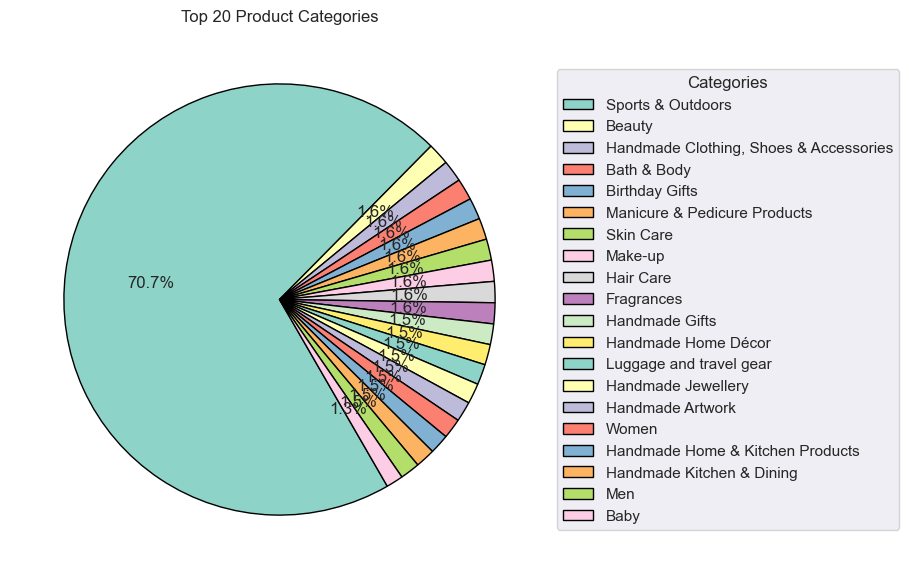

In [51]:
fig, ax = plt.subplots(figsize=(10, 7))  # Increase figure size to prevent overlap
ax.pie(
    top_20_categories,
    autopct='%.1f%%',
    startangle=300,  # Adjust starting angle as you prefer
    counterclock=False,  # 👈 This draws the wedges clockwise
    colors=sns.color_palette("Set3"),
    labeldistance=1.2,
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'}
)

# Add a legend outside the pie chart
plt.legend(
    top_20_categories.index,
    title="Categories", 
    loc="center left", 
    bbox_to_anchor=(1, 0.5)
)

plt.title("Top 20 Product Categories")
plt.show()

# Sports & Outdoors is the dominating at 70.7% where all others are below 1.7%

In [53]:
### Part 2: Delving into Product Pricing

# **Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

# 1. **Measures of Centrality**:
    # - Calculate the mean, median, and mode for the `price` of products.
display(df['price'].mean())
display(df['price'].median())
display(df['price'].mode().iloc[0])
    # - What's the average price point of products listed? How does this compare with the most common price point (mode)?
    # The mode is much lower (approximately 9.99) than the mean price (approximately 89.24), with a median of 19.09. This indicates a positive skew, where most individual product prices are relatively low, but a few extremely high-priced items pull the mean upward and create a long right tail in the distribution.




89.24380943923663

19.09

9.99

In [57]:
# 2. **Measures of Dispersion**:
    # - Determine the variance, standard deviation, range, and interquartile range for product `price`.
display(df['price'].var())
display(df['price'].std())
price_range = df['price'].max() - df['price'].min()
display(price_range)
    # - How varied are the product prices? Are there any indicators of a significant spread in prices?
    # Variance is very high at around 119445.5 around the the mean price.
    # The standard deviation approximately at 345.6 pounds.
    # Where the range price  is 100,000 pounds.



119445.48532256528

345.60886175352226

100000.0

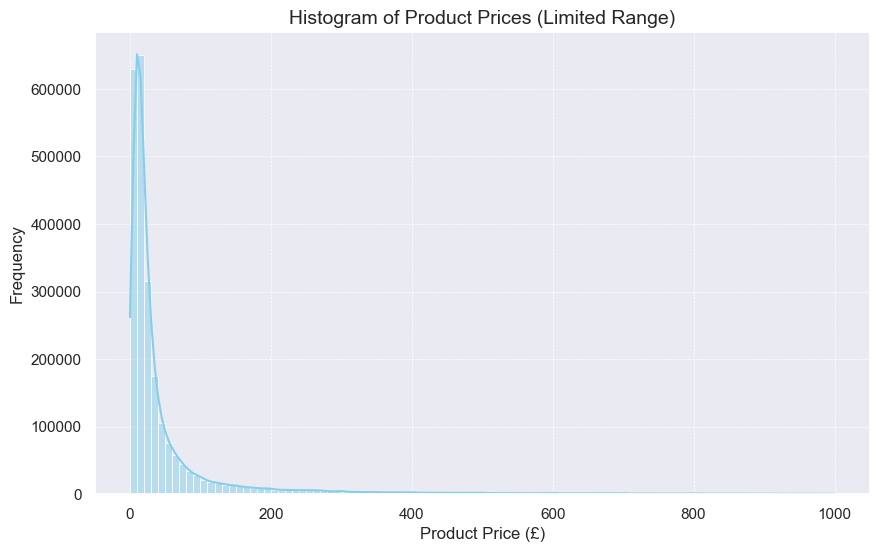

In [71]:
# 3. **Visualizations**:
    # - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    # - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

plt.figure(figsize=(10, 6))
sns.histplot(df[df['price'] < 1000]['price'], bins=100, kde=True, color='skyblue')
plt.title('Histogram of Product Prices (Limited Range)', fontsize=14)
plt.xlabel('Product Price (£)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

# Most products fall below £20, as evidenced by the histogram showing a peak in this range, and the distribution tapering off as prices rise.
# There is a small group of higher-priced outliers, but these are far less common.

In [83]:
print(df['stars'].isna().sum())
# No NaN values present in the 'stars' column

0


In [84]:
### Part 3: Unpacking Product Ratings

#**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

#1. **Measures of Centrality**:
#    - Calculate the mean, median, and mode for the `rating` of products.
display(df['stars'].mean())
display(df['stars'].median())
display(df['stars'].mode().iloc[0])
        
#    - How do customers generally rate products? Is there a common trend?
# According to star ratings from 0 to 5 bad to good. 
# The large number of 0-star ratings likely represents missing data rather than actual customer ratings. 
# This is suggested by the median and mode both being 0, despite a non-zero mean.


2.152836472966065

0.0

0.0

In [85]:
#2. **Measures of Dispersion**:
#    - Determine the variance, standard deviation, and interquartile range for product `rating`.
display(df['stars'].var())
display(df['stars'].std())

Q1 = df['stars'].quantile(0.25)
Q3 = df['stars'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR: {IQR}")


#    - Are the ratings consistent, or is there a wide variation in customer feedback?
# The high standard deviation of 2.19 and large IQR of 4.4 suggest a large spread throughout 
# the entire rating range, indicating significant variation in how customers rated products.

4.81743402976196

2.1948653785054697

IQR: 4.4


In [86]:
#3. **Shape of the Distribution**:
#    - Calculate the skewness and kurtosis for the `rating` column. 
display(df['stars'].skew())
display(df['stars'].kurtosis())

#    - Are the ratings normally distributed, or do they lean towards higher or lower values?
# Insights: The ratings have a very small skew (0.08), meaning they’re almost evenly spread around the center. 
# The low kurtosis (-1.93) shows the distribution is flatter than normal, with fewer extreme highs and lows.
# This shape might be affected by the large number of 0-star ratings, which could be placeholders rather than real reviews. 
# It may be worth looking at the data without those 0s for a better understanding.



0.08120735761080985

-1.9260061280432985

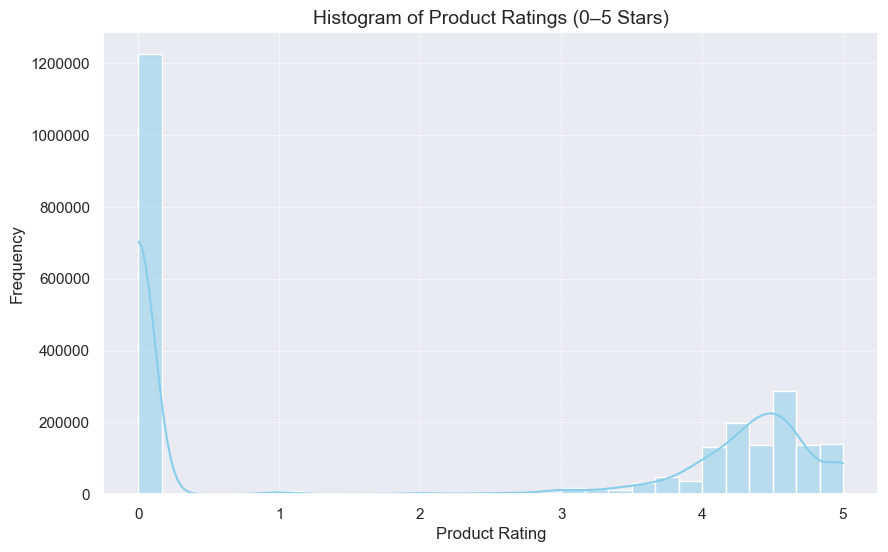

In [103]:
#4. **Visualizations**:
#    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

plt.figure(figsize=(10, 6))
sns.histplot(df[df['stars'] <= 5]['stars'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Product Ratings (0–5 Stars)', fontsize=14)
plt.xlabel('Product Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

# The histogram shows that there are over 1.2 million 0-star ratings. These 0 ratings distort the data. 
# If we remove them, the distribution would have a moderate negative skew, meaning most ratings would be higher (closer to 5 stars).
# This suggests that the 0-star ratings may be placeholders or errors, and removing them would provide a clearer view of actual 
# customer ratings.